<a href="https://colab.research.google.com/github/abdulloyev/DataScientis-openSource/blob/main/%236%20Polinomli%20regressiya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [343]:
!jupyter nbconvert --to html "/content/_6_Polinomli_regressiya.ipynb"


[NbConvertApp] Converting notebook /content/_6_Polinomli_regressiya.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 399098 bytes to /content/_6_Polinomli_regressiya.html


# **Polinomli regressiya** - ***Abdulloyev Ulug'bek***

# Kerakli kutubxonalrni yuklab olamiz


In [329]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame
import matplotlib.pyplot as plt

%matplotlib inline

# Datani o'qib olamiz

In [330]:
file_link = "https://drive.google.com/uc?export=download&id=1wbhmy37F_PfNiAtHq2HPZtfa2ew5F5e3"

In [331]:
df = pd.read_csv(file_link)
df.sample(5)

,Year,Value
32,1992,4.249341e+11
49,2009,5.059420e+12
42,2002,1.461906e+12
23,1983,2.289502e+11
8,1968,6.999350e+10


# Malumotlarni ajratib olamiz va normalizatsiya qilib olamiz (x, y)

Bu yerda biz `Year` ustunini, `Year` ustuning `max` qiymatiga bo'lib matijani `numpy`ning `ndarray`shaklida olamiz

> `np.array()` ishlatsakham shu natijani beradi, lekin bu aslida keladigan malumotimiz `ndarray` bo'lsa ham yangi nusxadagi `ndarray` yaratadi ***xotiradan yangi joy saqlaydi***

> `np.asanyarray()` esa keladigan data, `ndarray` bo'lsa yangi ndarray yaratib o'tirmaydi, ***xotiradan joy tejaydi***



In [332]:
x = np.asanyarray(df[["Year"]] / df[["Year"]].max())
y = np.asanyarray(df[["Value"]] / df[["Value"]].max())

# Chiziqli Regressiya modelini yaratamiz

In [333]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)

# Bashorat
yhat = model.predict(x)

## Madel bashorat qilgan natijani chizish

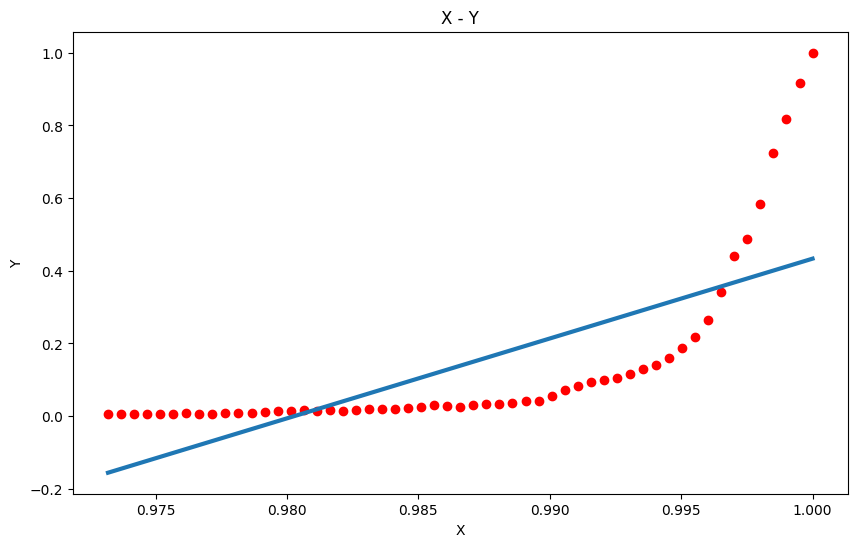

In [334]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='data')
plt.plot(x, yhat, linewidth=3.0, label="Bashorat chizig'i" )

plt.title("X - Y")
plt.xlabel("X")
plt.ylabel("Y")

plt.show()

## Chiziqli Regrissiya uchun xatolikni hisoblaymiz

In [335]:
from sklearn.metrics import mean_absolute_error

print("MAE:", mean_absolute_error(yhat, y))

MAE: 0.12657979406214762


# Polinomial Regressiya modelini yaratamiz x^3

In [336]:
from sklearn.preprocessing import PolynomialFeatures

# polinomning darajasini 3 deb tanlaymiz
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(x)
model.fit(X_poly, y)
yhat = model.predict(X_poly)

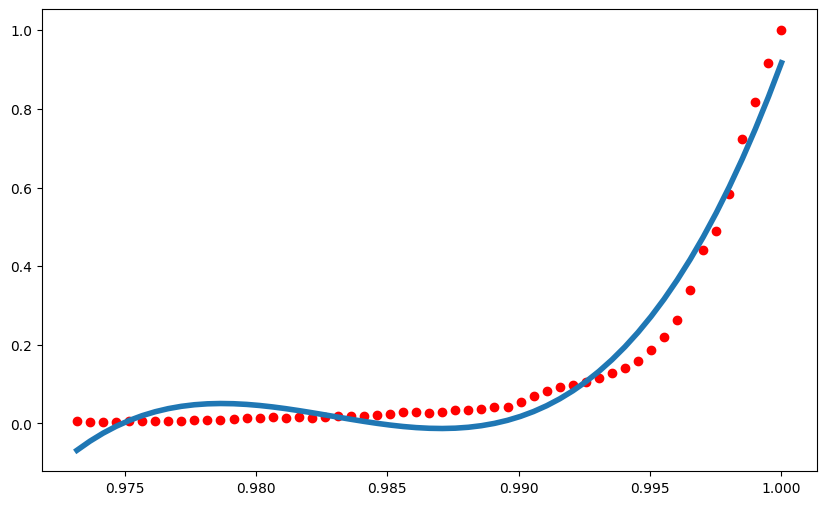

In [337]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label="Data")
plt.plot(x, yhat, linewidth=4.0, label="Bashorat chizig'i")
plt.show()

## Polinomial Regressiya uchun xatolikni hisoblaymiz

polinomning darajasini 3 deb tanlaganimizda bizda, bashorat chizig'imiz ancha yaxshilanganini ko'rdik endi, darajani yana oshirib ko'ramiz

In [338]:
print("MAE:", mean_absolute_error(yhat, y))

MAE: 0.0383015816830408


# Polinomial Regressiya modelini yaratamiz x^7

In [342]:
# polinomning darajasini 7 deb tanlaymiz
poly_features = PolynomialFeatures(degree=7, include_bias=False)
X_poly = poly_features.fit_transform(x)
model.fit(X_poly, y)
yhat = model.predict(X_poly)

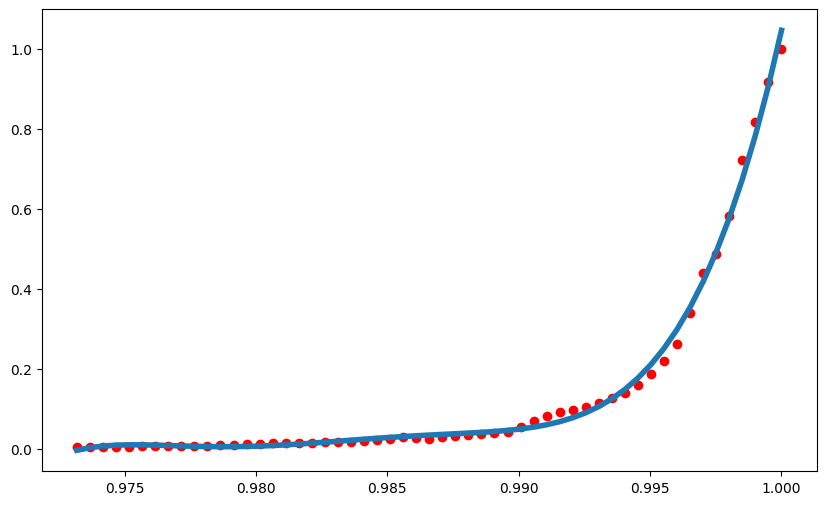

In [340]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label="Data")
plt.plot(x, yhat, linewidth=4.0, label="Bashorat chizig'i")
plt.show()

## Polinomial Regressiya uchun xatolikni hisoblaymiz

In [341]:
print("MAE:", mean_absolute_error(yhat, y))

MAE: 0.010043067895901835
